# Problem popularności i określenie jej znaczenia
W ramach realizacji mikroserwisu stworzone zostaną dwa endpointy. Podyktowane jest to problemem rozumienia popularności i jej zastosowania w aplikacji klienckiej. W podstawowym rozumieniu popularności utwory określane terminem _popularne_ charakteryzują się wysokim zainteresowaniem odbiorców, co przejawia się wysoką liczbą wyświetleń każdego z tych utworów. Prowadzić to może do sytuacji w której utwory cieszące się uznaniem wśród odbiorców pozostają na polecanych listach latami, co skutecznie blokuje nowe utwory. Podobną sytuację obrazuje efekt św. Mateusza, której znaczenie przedstawia poniższy fragment z serwisu Wikipedia.

 _Efekt św. Mateusza – ogólna zasada socjologiczna o ubożeniu osób biednych i bogaceniu się bogatych._
 

 W naszym przypadku piosenki będące popularne będą stawały sie coraz bardziej popularne, a te które dopiero przebijają się do mainstreamu nie będą pojawiały się w tworzonych playlistach popularnych utworów.

Naturalnym rozwiązaniem tego problemu może być uzależnienie _popularności_ utworów zarówno od liczby wyświetleń, jak i ich wzrostu w czasie. W takiej sytuacji utwory, które odnotowują kilkukrotny wzrost liczby odsłuchań, ale posiadają wciąż mniejszą liczbę wyświetleń niż  utwory bardziej popularne (utrzymujące lub tracące wyświetlenia), będą mogły być traktowane jako _popularne_. Dzięki temu znajdą się na odpowiednich playlistach, co pozwoli im zyskać na znaczeniu. 

# A/B testy
Głównym celem naszego rozwiązania jest zwiększenie zaangażowania użytkowników, więc w ramach A/B testów mierzone będzie ogólne zaangażowanie użytkowników wyrażone poprzez liczbę wyświetleń danego dnia odczytywanych z sesji użytkowników (zaangażowanie badane podczas rozwoju oprogramowania) lub logów mikroserwisu (podczas testów A/B). Dodatkowo zliczane będą wyświetlenia utworów, które zostały oznaczone za _popularne w następnym tygodniu_. Pozwoli to na faktyczną weryfikację wzrostu ich popularności. Testy przeprowadzone zostaną w przypadku zarówno, gdy nie będzie promocji tych utworów jak i z uwzględnieniem dodatkowej promocji (uwzględnienie karuzeli popularnych utworów, playlist) . Główne założenia A/B testów:
- podział użytkowników na 3 grupy (jedna z grup korzysta z aplikacji z wdrożonym modelem prostym, druga korzysta zaś z modelu zaawansowanego, trzecia zaś nie korzysta z polecania, co pozwoli przeanlizować czy wzrost zaagnażowania nie wynika z zewnętrznych czynników(zyskanie popularności aplikacji, trendy, czynniki związane z obecnym czasem roku np. wzrost słuchania muzyki w okolicach wakacji )
- mierzymy zaangażowanie w każdej z tych grup
W ten sposób uwzględnimy kryterium biznesowe badające wzrost zaangażowania użytkowników.

# Analityczne kryterium sukcesu
W poniższej sekcji sprawdzimy czy dla obu modeli spełnione zostało analityczne kryterium sukcesu. Poniżej przedstawiono kryteria sukcesu zaproponowane na wcześniejszym etapie rozwoju projektu. 
- **Co najmniej 60% utworów musi zostać poprawnie zidentyfikowanych jako mające potencjał na zdobycie popularności bez dodatkowej promocji.**  
  Wskaźnik ten opisany jest za pomocą poniższego równania:  
  $$\text{Dokładność identyfikacji} = \frac{\text{Liczba poprawnie wytypowanych utworów}}{\text{Całkowita liczba promowanych utworów}} \geq 60\%$$

- **Minimum 80% utworów wyświetlanych użytkownikowi i promowanych przez system powinno rzeczywiście zyskać na popularności.**  
  Wskaźnik ten opisany jest za pomocą poniższego równania:  
  $$\text{Skuteczność promocji} = \frac{\text{Liczba promowanych utworów, które stały się popularne}}{\text{Całkowita liczba promowanych utworów}} \geq 80\%$$

Całkowita liczba promowanych utworów przedstawia liczbę utworów, które zostały sklasyfikowane jako utwory, które mają zyskać popularność w przyszłości.  
Spełnienie powyższych kryteriów pozwoli na uniknięcie efektu manipulacji danymi i zapewni wiarygodność oraz wartość biznesową proponowanego rozwiązania.

# Model prosty
Pierwsza z zaimplementowanych modeli to klasyczny model bazujący na szeregach czasowych, który przewiduje liczbę odtworzeń utworu na podstawie historii z poprzednich dni. Wyrażenie opisujące prognozowanie wygląda następująco:
$$x_{i+1} = a_1 \cdot x_i + a_2 \cdot x_{i-1} + a_3 \cdot x_{i-2} + \dots + a_k \cdot x_{i-k+1} + c$$

Gdzie:
- $x_i, x_{i-1}, \dots, x_{i-k+1}$ reprezentują liczbę odtworzeń w dniach $i, i-1, \dots, i-k+1$,
- $x_{i+1}$ to prognozowana liczba odtworzeń na kolejny dzień ($i+1$),
- $a_1, a_2, \dots, a_k$ to współczynniki modelu, które należy oszacować i które określają wpływ danych z poprzednich dni na wynik prognozy,
- $c$ to stała, która może odzwierciedlać inne czynniki zewnętrzne wpływające na liczbę odtworzeń,
- $k$ oznacza liczbę dni wstecz, które są brane pod uwagę w modelu,
- $i$ jest indeksem oznaczającym dzień, dla którego przeprowadzana jest analiza i prognoza.

Model ten opiera się na założeniu, że przeszłe dane o odtworzeniach pozwalają na skuteczne przewidywanie przyszłych zachowań, uwzględniając wpływy historyczne w formie współczynników wagowych.

# Model zaawansowany
W bardziej zaawansowanej architekturze planowane jest zastosowanie sieci rekurencyjnych, a dokładniej modelu LSTM (Long Short-Term Memory). Sieć LSTM została wybrana z uwagi na swoją zdolność do modelowania długoterminowych zależności czasowych, co jest szczególnie istotne dla utworów, których popularność wzrasta stopniowo, a nie bezpośrednio po ich publikacji. Ponadto, LSTM jest odporna na problem zanikania gradientu, co umożliwia efektywne uczenie się z danych sekwencyjnych o dużej długości.

Model LSTM będzie przewidywał dwa główne wyjścia:
	•	Zmienne główne: Liczba odtworzeń utworu w przyszłych dniach, będąca głównym celem predykcji,
	•	Zmienne dodatkowe: Średnia liczba odtworzeń danego wykonawcy, uwzględniana jako istotny element wewnętrznego stanu modelu.

Struktura modelu:
	•	Wejście: Dane obejmujące liczbę odtworzeń utworu w poprzednich $k$ dniach, statyczne informacje dotyczące utworu i wykonawcy oraz średnią liczbę odtworzeń wykonawcy w przeszłości.
	•	Warstwa LSTM: Mechanizm LSTM uczy się czasowych zależności między liczbą odtworzeń oraz uwzględnia wpływ średniej liczby odtworzeń wykonawcy na dalsze prognozy. Średnia ta jest traktowana jako część stanu wewnętrznego modelu i wpływa na dokładność predykcji.
	•	Wyjście: Prognoza liczby odtworzeń utworu w określonej perspektywie czasowej (np. na 7 dni do przodu).

Kluczowe zalety tego podejścia:

W porównaniu do klasycznego modelu bazującego wyłącznie na szeregach czasowych, model LSTM uwzględnia nie tylko sekwencyjne zależności czasowe, ale również kontekst związany z wykonawcą utworu. Dzięki temu model może skuteczniej identyfikować trendy popularności i przewidywać przyszłe odtworzenia, co pozwala na bardziej precyzyjne rekomendacje.

# Implementacja

## Wczytanie i przygotowanie danych

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import pandas as pd

# Path to the JSONL file
file_path = "../data-v3/sessions.jsonl"

# Specify the chunk size
chunk_size = 1000000

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read and append chunks to the DataFrame
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    df = pd.concat([df, chunk], ignore_index=True)

# Verify the resulting DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29004137 entries, 0 to 29004136
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   session_id  int64         
 1   timestamp   datetime64[ns]
 2   user_id     int64         
 3   track_id    object        
 4   event_type  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.1+ GB
None


In [6]:
sessions = df

In [7]:
sessions['date'] = sessions['timestamp'].dt.date

In [8]:
sessions


,session_id,timestamp,user_id,track_id,event_type,date
0,124,2024-12-21 13:13:30.000,101,3xRcQ04b0l5RiU2w7lJhCD,play,2024-12-21
1,124,2024-12-21 13:16:23.613,101,3xRcQ04b0l5RiU2w7lJhCD,like,2024-12-21
2,124,2024-12-21 13:17:20.920,101,1ZycJRpLOazlLcoFGxGROO,play,2024-12-21
3,125,2024-11-16 05:48:57.640,101,1Tf0qifzTHdDC9RnTW9Di3,play,2024-11-16
4,125,2024-11-16 05:50:37.178,101,1Tf0qifzTHdDC9RnTW9Di3,like,2024-11-16
...,...,...,...,...,...,...
29004132,2057764,2024-05-06 06:37:11.821,20100,None,advertisment,2024-05-06
29004133,2057764,2024-05-06 06:37:11.821,20100,7vGRXiYWFk6NjUnsNjQJQd,like,2024-05-06
29004134,2057764,2024-05-06 06:40:34.894,20100,13VDHbpoKlRhtgUaWTE2Ld,play,2024-05-06
29004135,2057765,2024-02-07 08:47:43.893,20100,7BFI9QZPQKgYuR2HhDgwbG,play,2024-02-07


In [9]:
filtered_sessions = sessions.dropna(subset = ['track_id'])
filtered_sessions

,session_id,timestamp,user_id,track_id,event_type,date
0,124,2024-12-21 13:13:30.000,101,3xRcQ04b0l5RiU2w7lJhCD,play,2024-12-21
1,124,2024-12-21 13:16:23.613,101,3xRcQ04b0l5RiU2w7lJhCD,like,2024-12-21
2,124,2024-12-21 13:17:20.920,101,1ZycJRpLOazlLcoFGxGROO,play,2024-12-21
3,125,2024-11-16 05:48:57.640,101,1Tf0qifzTHdDC9RnTW9Di3,play,2024-11-16
4,125,2024-11-16 05:50:37.178,101,1Tf0qifzTHdDC9RnTW9Di3,like,2024-11-16
...,...,...,...,...,...,...
29004131,2057764,2024-05-06 06:36:04.561,20100,7vGRXiYWFk6NjUnsNjQJQd,play,2024-05-06
29004133,2057764,2024-05-06 06:37:11.821,20100,7vGRXiYWFk6NjUnsNjQJQd,like,2024-05-06
29004134,2057764,2024-05-06 06:40:34.894,20100,13VDHbpoKlRhtgUaWTE2Ld,play,2024-05-06
29004135,2057765,2024-02-07 08:47:43.893,20100,7BFI9QZPQKgYuR2HhDgwbG,play,2024-02-07


In [10]:
events_data_df = pd.DataFrame()


In [11]:
events_data_df["event_type"] = filtered_sessions['event_type']
events_data_df['track_id'] = filtered_sessions['track_id']
events_data_df["timestamp"] = filtered_sessions["timestamp"]

In [12]:
events_data_df

,event_type,track_id,timestamp
0,play,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:13:30.000
1,like,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:16:23.613
2,play,1ZycJRpLOazlLcoFGxGROO,2024-12-21 13:17:20.920
3,play,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:48:57.640
4,like,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:50:37.178
...,...,...,...
29004131,play,7vGRXiYWFk6NjUnsNjQJQd,2024-05-06 06:36:04.561
29004133,like,7vGRXiYWFk6NjUnsNjQJQd,2024-05-06 06:37:11.821
29004134,play,13VDHbpoKlRhtgUaWTE2Ld,2024-05-06 06:40:34.894
29004135,play,7BFI9QZPQKgYuR2HhDgwbG,2024-02-07 08:47:43.893


In [13]:
events_data_df['timestamp'] = pd.to_datetime(events_data_df['timestamp'])
start_date = events_data_df['timestamp'].min()
events_data_df['week_number'] = ((events_data_df['timestamp'] - start_date).dt.days // 7) + 1
events_data_df['week_range'] = events_data_df['week_number'].apply(
    lambda x: f"week {x} {start_date + pd.Timedelta(weeks=x-1):%Y-%m-%d} - {start_date + pd.Timedelta(weeks=x):%Y-%m-%d}"
)
events_data_df


,event_type,track_id,timestamp,week_number,week_range
0,play,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:13:30.000,49,week 49 2024-12-15 - 2024-12-22
1,like,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:16:23.613,49,week 49 2024-12-15 - 2024-12-22
2,play,1ZycJRpLOazlLcoFGxGROO,2024-12-21 13:17:20.920,49,week 49 2024-12-15 - 2024-12-22
3,play,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:48:57.640,44,week 44 2024-11-10 - 2024-11-17
4,like,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:50:37.178,44,week 44 2024-11-10 - 2024-11-17
...,...,...,...,...,...
29004131,play,7vGRXiYWFk6NjUnsNjQJQd,2024-05-06 06:36:04.561,17,week 17 2024-05-05 - 2024-05-12
29004133,like,7vGRXiYWFk6NjUnsNjQJQd,2024-05-06 06:37:11.821,17,week 17 2024-05-05 - 2024-05-12
29004134,play,13VDHbpoKlRhtgUaWTE2Ld,2024-05-06 06:40:34.894,17,week 17 2024-05-05 - 2024-05-12
29004135,play,7BFI9QZPQKgYuR2HhDgwbG,2024-02-07 08:47:43.893,4,week 4 2024-02-04 - 2024-02-11


In [14]:
events_data_df

,event_type,track_id,timestamp,week_number,week_range
0,play,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:13:30.000,49,week 49 2024-12-15 - 2024-12-22
1,like,3xRcQ04b0l5RiU2w7lJhCD,2024-12-21 13:16:23.613,49,week 49 2024-12-15 - 2024-12-22
2,play,1ZycJRpLOazlLcoFGxGROO,2024-12-21 13:17:20.920,49,week 49 2024-12-15 - 2024-12-22
3,play,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:48:57.640,44,week 44 2024-11-10 - 2024-11-17
4,like,1Tf0qifzTHdDC9RnTW9Di3,2024-11-16 05:50:37.178,44,week 44 2024-11-10 - 2024-11-17
...,...,...,...,...,...
29004131,play,7vGRXiYWFk6NjUnsNjQJQd,2024-05-06 06:36:04.561,17,week 17 2024-05-05 - 2024-05-12
29004133,like,7vGRXiYWFk6NjUnsNjQJQd,2024-05-06 06:37:11.821,17,week 17 2024-05-05 - 2024-05-12
29004134,play,13VDHbpoKlRhtgUaWTE2Ld,2024-05-06 06:40:34.894,17,week 17 2024-05-05 - 2024-05-12
29004135,play,7BFI9QZPQKgYuR2HhDgwbG,2024-02-07 08:47:43.893,4,week 4 2024-02-04 - 2024-02-11


In [15]:
event_counts = events_data_df.groupby(['track_id', 'event_type', 'week_number']).size().unstack(level='event_type', fill_value=0)    .reset_index()
event_counts

event_type,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,19,27,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,27,5
2,003FTlCpBTM4eSqYSWPv4H,3,11,18,4
3,003FTlCpBTM4eSqYSWPv4H,4,16,24,5
4,003FTlCpBTM4eSqYSWPv4H,5,12,18,0
...,...,...,...,...,...
650085,7zzoxJbgjme3366mOp5UnH,49,8,10,0
650086,7zzoxJbgjme3366mOp5UnH,50,14,18,1
650087,7zzoxJbgjme3366mOp5UnH,51,7,8,2
650088,7zzoxJbgjme3366mOp5UnH,52,12,18,4


In [16]:
max_week = max(event_counts['week_number'])

In [17]:
all_weeks = pd.DataFrame(
    [(track_id, week) for track_id in event_counts['track_id'].unique() for week in range(1, max_week+1)],
    columns=['track_id', 'week_number']
)


In [18]:
all_weeks

,track_id,week_number
0,003FTlCpBTM4eSqYSWPv4H,1
1,003FTlCpBTM4eSqYSWPv4H,2
2,003FTlCpBTM4eSqYSWPv4H,3
3,003FTlCpBTM4eSqYSWPv4H,4
4,003FTlCpBTM4eSqYSWPv4H,5
...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49
652055,7zzoxJbgjme3366mOp5UnH,50
652056,7zzoxJbgjme3366mOp5UnH,51
652057,7zzoxJbgjme3366mOp5UnH,52


In [19]:
event_counts.sort_values(by='play')


event_type,track_id,week_number,like,play,skip
221097,2YolSRrYvFxhTGjbiT33yH,53,0,0,1
248320,2sFU5bR4Nsk0SWtZZIc36r,53,0,0,1
275473,3CD75JGmSMKA3RW5RtOwAz,53,0,0,1
154042,1mhVXWduD8ReDwusfaHNwU,53,1,0,1
589633,71iSmEeF0qRVyULABxP75P,53,1,1,0
...,...,...,...,...,...
531914,6Im9k8u9iIzKMrmV7BWtlF,13,254,928,72
499565,5uCax9HTNlzGybIStD3vDh,5,228,934,77
534501,6KfoDhO4XUWSbnyKjNp9c4,13,272,935,79
446730,5FVd6KXrgO9B3JPmC8OPst,13,266,935,69


In [20]:
event_counts_complete = pd.merge(
    all_weeks,
    event_counts,
    on=['track_id', 'week_number'],
    how='left'
)


In [21]:
event_counts_complete

,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,19.0,27.0,2.0
1,003FTlCpBTM4eSqYSWPv4H,2,16.0,27.0,5.0
2,003FTlCpBTM4eSqYSWPv4H,3,11.0,18.0,4.0
3,003FTlCpBTM4eSqYSWPv4H,4,16.0,24.0,5.0
4,003FTlCpBTM4eSqYSWPv4H,5,12.0,18.0,0.0
...,...,...,...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49,8.0,10.0,0.0
652055,7zzoxJbgjme3366mOp5UnH,50,14.0,18.0,1.0
652056,7zzoxJbgjme3366mOp5UnH,51,7.0,8.0,2.0
652057,7zzoxJbgjme3366mOp5UnH,52,12.0,18.0,4.0


In [22]:
event_counts_complete.fillna(0, inplace=True)

In [23]:
event_counts_complete


,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,19.0,27.0,2.0
1,003FTlCpBTM4eSqYSWPv4H,2,16.0,27.0,5.0
2,003FTlCpBTM4eSqYSWPv4H,3,11.0,18.0,4.0
3,003FTlCpBTM4eSqYSWPv4H,4,16.0,24.0,5.0
4,003FTlCpBTM4eSqYSWPv4H,5,12.0,18.0,0.0
...,...,...,...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49,8.0,10.0,0.0
652055,7zzoxJbgjme3366mOp5UnH,50,14.0,18.0,1.0
652056,7zzoxJbgjme3366mOp5UnH,51,7.0,8.0,2.0
652057,7zzoxJbgjme3366mOp5UnH,52,12.0,18.0,4.0


In [24]:
for col in event_counts.columns[2:]:
    event_counts_complete[col] = event_counts_complete[col].astype(int)

In [25]:
event_counts_complete

,track_id,week_number,like,play,skip
0,003FTlCpBTM4eSqYSWPv4H,1,19,27,2
1,003FTlCpBTM4eSqYSWPv4H,2,16,27,5
2,003FTlCpBTM4eSqYSWPv4H,3,11,18,4
3,003FTlCpBTM4eSqYSWPv4H,4,16,24,5
4,003FTlCpBTM4eSqYSWPv4H,5,12,18,0
...,...,...,...,...,...
652054,7zzoxJbgjme3366mOp5UnH,49,8,10,0
652055,7zzoxJbgjme3366mOp5UnH,50,14,18,1
652056,7zzoxJbgjme3366mOp5UnH,51,7,8,2
652057,7zzoxJbgjme3366mOp5UnH,52,12,18,4


In [26]:
len(list(set(event_counts_complete["track_id"])))

12303

In [27]:
tracks = pd.read_json("../data-v3/tracks.jsonl", lines=True)

In [28]:
tracks

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,Missing You,65,214987,0,7gAppWoH7pcYmphCVTXkzs,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770
22408,1uviKYHZuM4uINK33F7sCt,Fix It to Break It,70,198799,0,7okSU80WTrn4LXlyXYbX3P,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414
22409,1fXmDeiCb3ABt5CzkMxp4u,Lotus Inn,63,195868,0,2jnIB6XdLvnJUeNTy5A0J2,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984
22410,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,67,202355,0,7okSU80WTrn4LXlyXYbX3P,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447


In [29]:
artists = pd.read_json("../data-v3/artists.jsonl", lines=True)

In [30]:
artists

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,[speedrun]
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,[nz pop]
...,...,...,...
1662,6AMd49uBDJfhf30Ak2QR5s,Coi Leray,"[pop r&b, r&b, trap queen, viral rap]"
1663,6qgnBH6iDM91ipVXv28OMu,KAYTRANADA,"[escape room, indie soul, lgbtq+ hip hop]"
1664,5q8HGNo0BjLWaTAhRtbwxa,Brantley Gilbert,"[contemporary country, country, country road, ..."
1665,26T4yOaOoFJvUvxR87Y9HO,Bethel Music,"[ambient worship, ccm, christian music, deep c..."


In [31]:
artists.drop("name", axis=1, inplace=True)

In [32]:
artists

,id,genres
0,7jVv8c5Fj3E9VhNjxT4snq,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,"[dance pop, edm, pop dance, pop house, tropica..."
2,3OKg7YbOIatODzkRIbLJR4,[speedrun]
3,4f7KfxeHq9BiylGmyXepGt,"[desi pop, filmi, modern bollywood]"
4,56mfhUDKa1vec6rSLZV5Eg,[nz pop]
...,...,...
1662,6AMd49uBDJfhf30Ak2QR5s,"[pop r&b, r&b, trap queen, viral rap]"
1663,6qgnBH6iDM91ipVXv28OMu,"[escape room, indie soul, lgbtq+ hip hop]"
1664,5q8HGNo0BjLWaTAhRtbwxa,"[contemporary country, country, country road, ..."
1665,26T4yOaOoFJvUvxR87Y9HO,"[ambient worship, ccm, christian music, deep c..."


In [33]:
max_len = 0
for genres in artists["genres"]:
    max_len = max(max_len, len(genres))
max_len

12

In [34]:
tracks_artists = tracks.merge(artists, left_on="id_artist", right_on="id", how="left")


In [35]:
tracks_artists

,id_x,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id_y,genres
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973,19eLuQmk9aCobbVDHc6eek,"[adult standards, dixieland, harlem renaissanc..."
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783,1Mxqyy3pSjf8kZZL4QVxS0,"[adult standards, easy listening, lounge]"
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600,1Mxqyy3pSjf8kZZL4QVxS0,"[adult standards, easy listening, lounge]"
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974,1Mxqyy3pSjf8kZZL4QVxS0,"[adult standards, easy listening, lounge]"
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150,1Mxqyy3pSjf8kZZL4QVxS0,"[adult standards, easy listening, lounge]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,Missing You,65,214987,0,7gAppWoH7pcYmphCVTXkzs,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770,7gAppWoH7pcYmphCVTXkzs,"[boy band, dance pop, pop, post-teen pop]"
22408,1uviKYHZuM4uINK33F7sCt,Fix It to Break It,70,198799,0,7okSU80WTrn4LXlyXYbX3P,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414,7okSU80WTrn4LXlyXYbX3P,"[alt z, indie cafe pop, pop]"
22409,1fXmDeiCb3ABt5CzkMxp4u,Lotus Inn,63,195868,0,2jnIB6XdLvnJUeNTy5A0J2,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,2jnIB6XdLvnJUeNTy5A0J2,"[boy band, dance pop, pop, post-teen pop, teen..."
22410,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,67,202355,0,7okSU80WTrn4LXlyXYbX3P,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,7okSU80WTrn4LXlyXYbX3P,"[alt z, indie cafe pop, pop]"


In [36]:
tracks_artists.drop("name", axis=1, inplace=True)
tracks_artists.drop("id_artist", axis=1, inplace=True)
tracks_artists.drop("id_y", axis=1, inplace=True)

In [37]:
tracks_artists

,id_x,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres
0,0RNxWy0PC3AyH4ThH3aGK6,55,201467,0,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973,"[adult standards, dixieland, harlem renaissanc..."
1,2W889aLIKxULEefrleFBFI,54,198000,0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783,"[adult standards, easy listening, lounge]"
2,4Pnzw1nLOpDNV6MKI5ueIR,55,199000,0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600,"[adult standards, easy listening, lounge]"
3,7GLmfKOe5BfOXk7334DoKt,54,163000,0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974,"[adult standards, easy listening, lounge]"
4,6kD1SNGPkfX9LwaGd1FG92,53,186173,0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150,"[adult standards, easy listening, lounge]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,65,214987,0,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770,"[boy band, dance pop, pop, post-teen pop]"
22408,1uviKYHZuM4uINK33F7sCt,70,198799,0,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414,"[alt z, indie cafe pop, pop]"
22409,1fXmDeiCb3ABt5CzkMxp4u,63,195868,0,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,"[boy band, dance pop, pop, post-teen pop, teen..."
22410,27kcZEJvhkb1rzZS9gCpdA,67,202355,0,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,"[alt z, indie cafe pop, pop]"


In [38]:
all_genres = [genre for sublist in tracks_artists['genres'] for genre in sublist]
unique_genres = list(set(all_genres))
unique_genres = [""] + unique_genres

In [39]:
len(unique_genres)

780

In [40]:
genre_to_idx = {genre: idx for idx, genre in enumerate(unique_genres)}
tracks_artists['genre_indices'] = tracks_artists['genres'].apply(lambda x: [genre_to_idx[g] for g in x])

In [41]:
tracks_artists

,id_x,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,genre_indices
0,0RNxWy0PC3AyH4ThH3aGK6,55,201467,0,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973,"[adult standards, dixieland, harlem renaissanc...","[321, 95, 530, 213, 313, 470, 328, 249]"
1,2W889aLIKxULEefrleFBFI,54,198000,0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783,"[adult standards, easy listening, lounge]","[321, 407, 469]"
2,4Pnzw1nLOpDNV6MKI5ueIR,55,199000,0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600,"[adult standards, easy listening, lounge]","[321, 407, 469]"
3,7GLmfKOe5BfOXk7334DoKt,54,163000,0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974,"[adult standards, easy listening, lounge]","[321, 407, 469]"
4,6kD1SNGPkfX9LwaGd1FG92,53,186173,0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150,"[adult standards, easy listening, lounge]","[321, 407, 469]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,65,214987,0,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770,"[boy band, dance pop, pop, post-teen pop]","[471, 284, 94, 176]"
22408,1uviKYHZuM4uINK33F7sCt,70,198799,0,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414,"[alt z, indie cafe pop, pop]","[770, 623, 94]"
22409,1fXmDeiCb3ABt5CzkMxp4u,63,195868,0,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,"[boy band, dance pop, pop, post-teen pop, teen...","[471, 284, 94, 176, 301]"
22410,27kcZEJvhkb1rzZS9gCpdA,67,202355,0,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,"[alt z, indie cafe pop, pop]","[770, 623, 94]"


In [42]:
tracks_artists.drop("genres", axis=1, inplace=True)

In [43]:
tracks_artists

,id_x,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_indices
0,0RNxWy0PC3AyH4ThH3aGK6,55,201467,0,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973,"[321, 95, 530, 213, 313, 470, 328, 249]"
1,2W889aLIKxULEefrleFBFI,54,198000,0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783,"[321, 407, 469]"
2,4Pnzw1nLOpDNV6MKI5ueIR,55,199000,0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600,"[321, 407, 469]"
3,7GLmfKOe5BfOXk7334DoKt,54,163000,0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974,"[321, 407, 469]"
4,6kD1SNGPkfX9LwaGd1FG92,53,186173,0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150,"[321, 407, 469]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,65,214987,0,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770,"[471, 284, 94, 176]"
22408,1uviKYHZuM4uINK33F7sCt,70,198799,0,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414,"[770, 623, 94]"
22409,1fXmDeiCb3ABt5CzkMxp4u,63,195868,0,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,"[471, 284, 94, 176, 301]"
22410,27kcZEJvhkb1rzZS9gCpdA,67,202355,0,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,"[770, 623, 94]"


In [44]:
def convert_to_datetime(date_str):
    try:
        if len(date_str) == 4:  # Only year
            return pd.to_datetime(date_str + '-01-01')
        elif len(date_str) == 7:  # Year and month
            return pd.to_datetime(date_str + '-01')
        else:  # Full date
            return pd.to_datetime(date_str)
    except Exception as e:
        return pd.NaT

# Apply the function to the release_date column
tracks_artists['release_date'] = tracks_artists['release_date'].apply(convert_to_datetime)

# Convert the datetime to a timestamp (as a number)
tracks_artists['release_date_timestamp'] = tracks_artists['release_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

In [45]:
tracks_artists

,id_x,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_indices,release_date_timestamp
0,0RNxWy0PC3AyH4ThH3aGK6,55,201467,0,1929-01-01,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973,"[321, 95, 530, 213, 313, 470, 328, 249]",-1.293840e+09
1,2W889aLIKxULEefrleFBFI,54,198000,0,1943-01-01,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783,"[321, 407, 469]",-8.520768e+08
2,4Pnzw1nLOpDNV6MKI5ueIR,55,199000,0,1944-01-01,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600,"[321, 407, 469]",-8.205408e+08
3,7GLmfKOe5BfOXk7334DoKt,54,163000,0,1944-01-01,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974,"[321, 407, 469]",-8.205408e+08
4,6kD1SNGPkfX9LwaGd1FG92,53,186173,0,1944-01-01,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150,"[321, 407, 469]",-8.205408e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,65,214987,0,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770,"[471, 284, 94, 176]",1.555632e+09
22408,1uviKYHZuM4uINK33F7sCt,70,198799,0,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414,"[770, 623, 94]",1.585267e+09
22409,1fXmDeiCb3ABt5CzkMxp4u,63,195868,0,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,"[471, 284, 94, 176, 301]",1.607040e+09
22410,27kcZEJvhkb1rzZS9gCpdA,67,202355,0,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,"[770, 623, 94]",1.606435e+09


In [46]:
tracks_artists.drop("release_date", axis=1, inplace=True)

In [47]:
tracks_artists


,id_x,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_indices,release_date_timestamp
0,0RNxWy0PC3AyH4ThH3aGK6,55,201467,0,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973,"[321, 95, 530, 213, 313, 470, 328, 249]",-1.293840e+09
1,2W889aLIKxULEefrleFBFI,54,198000,0,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783,"[321, 407, 469]",-8.520768e+08
2,4Pnzw1nLOpDNV6MKI5ueIR,55,199000,0,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600,"[321, 407, 469]",-8.205408e+08
3,7GLmfKOe5BfOXk7334DoKt,54,163000,0,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974,"[321, 407, 469]",-8.205408e+08
4,6kD1SNGPkfX9LwaGd1FG92,53,186173,0,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150,"[321, 407, 469]",-8.205408e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,65,214987,0,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770,"[471, 284, 94, 176]",1.555632e+09
22408,1uviKYHZuM4uINK33F7sCt,70,198799,0,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414,"[770, 623, 94]",1.585267e+09
22409,1fXmDeiCb3ABt5CzkMxp4u,63,195868,0,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,"[471, 284, 94, 176, 301]",1.607040e+09
22410,27kcZEJvhkb1rzZS9gCpdA,67,202355,0,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,"[770, 623, 94]",1.606435e+09


## Model prosty

### Uczenie

In [48]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import numpy as np

class SongEventDataset(Dataset):
    def __init__(self, event_counts, max_genres=12, num_keys=12, split="train", val_part=0.1, test_part=0.1, seq_len=5):
        self.event_counts = event_counts
        self.max_genres = max_genres
        self.num_keys = num_keys

        prev_id = event_counts["track_id"][0]
        self.n_weeks = 0
        for index, row in event_counts.iterrows():
            if(row["track_id"] != prev_id):
                break
            self.n_weeks += 1
        print(self.n_weeks)

        self.n_val = int(val_part * self.n_weeks)
        self.n_test = int(test_part * self.n_weeks)
        self.n_train = self.n_weeks - self.n_val - self.n_test

        self.n_seqs = self.n_weeks - seq_len
        self.split = split

        self.offset = 0
        if self.split == "val":
            self.n_seqs = self.n_val
            self.offset = self.n_train - seq_len
        if self.split == "test":
            self.n_seqs = self.n_test
            self.offset = self.n_train + self.n_val - seq_len

        self.seq_len = seq_len

    def __len__(self):
        return len(self.event_counts) // self.n_weeks * self.n_seqs

    def __getitem__(self, idx):
        # Calculate song and sequence indices
        song_idx = idx // self.n_seqs
        seq_idx = idx % self.n_seqs
        idx_start = song_idx * self.n_weeks + seq_idx + self.offset
        idx_end = idx_start + self.seq_len

        # Slice the DataFrame for the sequence
        seq_df = self.event_counts.iloc[idx_start:idx_end]

        # Prepare input tensors using vectorized operations
        # Event features: [seq_len, 3]
        event_features_seq = torch.tensor(seq_df[['play', 'like', 'skip']].values, dtype=torch.float)

        # One-hot encoded keys: [seq_len, num_keys]

        # Genre tensor: [seq_len, max_genres]

        # Target output (play, like, skip) at idx_end
        target_row = self.event_counts.iloc[idx_end]
        target = torch.tensor([target_row['play'], target_row['like'], target_row['skip']], dtype=torch.float)

        return (event_features_seq), target

In [49]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, sequence_length):
        super(LinearRegressionModel, self).__init__()
        # Flatten the input sequence and apply a linear layer to get 3 output values per sample
        self.flatten = nn.Flatten(start_dim=1)  # Flatten the sequence dimension
        self.linear = nn.Linear(input_size * sequence_length, 3)  # 3 outputs (play, like, skip)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input tensor
        return self.linear(x)

In [53]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error

# Assuming SongEventDataset is already defined and imported

# Choose the dataset split (train, val, test)
train_dataset = list(SongEventDataset(event_counts, split="train"))
val_dataset = list(SongEventDataset(event_counts, split="val"))
test_dataset = list(SongEventDataset(event_counts, split="test"))

# Create DataLoader for each dataset
batch_size = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Calculate input size for the model
sample_features, _ = train_dataset[0]
input_size = sample_features.shape[1]  # Get the number of features (not the batch size)
print(f"Input size for the linear regression model: {input_size}")

53
53
53
Input size for the linear regression model: 3


In [54]:
# Initialize model, loss function, and optimizer
model = LinearRegressionModel(input_size, 5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()  # Set model to training mode

    # Initialize variables to accumulate the losses
    epoch_train_loss = 0
    num_batches = 0

    # Training phase
    for inputs, target in train_dataloader:
        num_batches += 1
        # Flatten the input features
        event_features_seq = inputs
        features = event_features_seq.flatten(start_dim=1)

        # Forward pass
        predictions = model(features)
        loss = criterion(predictions.squeeze(), target)

        # Accumulate the training loss
        epoch_train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute the average training loss
    avg_train_loss = epoch_train_loss / num_batches
    train_losses.append(avg_train_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.4f}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    epoch_val_loss = 0  # Reset validation loss for this epoch

    with torch.no_grad():
        for val_inputs, val_target in val_dataloader:
            val_features = val_inputs.flatten(start_dim=1)
            val_predictions = model(val_features)
            val_loss = criterion(val_predictions.squeeze(), val_target)

            # Accumulate the validation loss
            epoch_val_loss += val_loss.item()

    # Compute the average validation loss
    avg_val_loss = epoch_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Validation Loss after Epoch {epoch + 1}: {avg_val_loss:.4f}")

Epoch 1/10, Training Loss: 331.4800
Validation Loss after Epoch 1: 104.3668
Epoch 2/10, Training Loss: 104.9767
Validation Loss after Epoch 2: 73.7462
Epoch 3/10, Training Loss: 97.0143
Validation Loss after Epoch 3: 70.8461
Epoch 4/10, Training Loss: 95.4495
Validation Loss after Epoch 4: 69.8850
Epoch 5/10, Training Loss: 94.6567
Validation Loss after Epoch 5: 75.2782
Epoch 6/10, Training Loss: 94.1156
Validation Loss after Epoch 6: 68.4213
Epoch 7/10, Training Loss: 93.6133
Validation Loss after Epoch 7: 68.4236
Epoch 8/10, Training Loss: 93.0346
Validation Loss after Epoch 8: 68.1153
Epoch 9/10, Training Loss: 92.9802
Validation Loss after Epoch 9: 67.4775
Epoch 10/10, Training Loss: 92.7079
Validation Loss after Epoch 10: 68.1237


### Ewaluacja

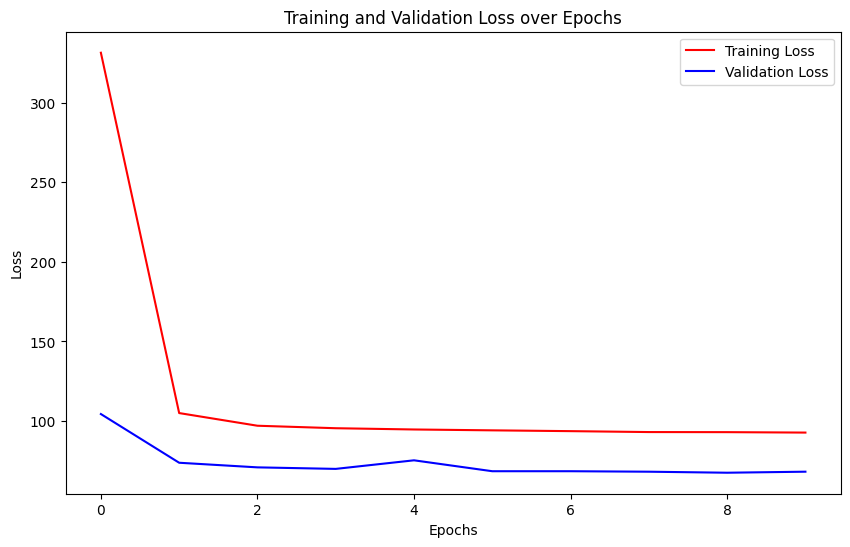

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss', color='red')
plt.plot(range(epochs), val_losses, label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [56]:
torch.save(model.state_dict(), 'model_base.pth')

In [61]:
from sklearn.metrics import r2_score
# Test the model after training
model.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for test_inputs, test_target in test_dataloader:
        test_features = test_inputs.flatten(start_dim=1)
        test_predictions = model(test_features)
        y_true.append(test_target)
        y_pred.append(test_predictions.squeeze())

# Convert lists to tensors for evaluation
y_true = torch.cat(y_true, dim=0)
y_pred = torch.cat(y_pred, dim=0)
y_true_numpy = y_true.numpy()
y_pred_numpy = y_pred.numpy()
# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_true_numpy, y_pred_numpy)
r2 = r2_score(y_true_numpy, y_pred_numpy)
print(f"Test MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Test MSE: 86.2728
R-squared: 0.9129


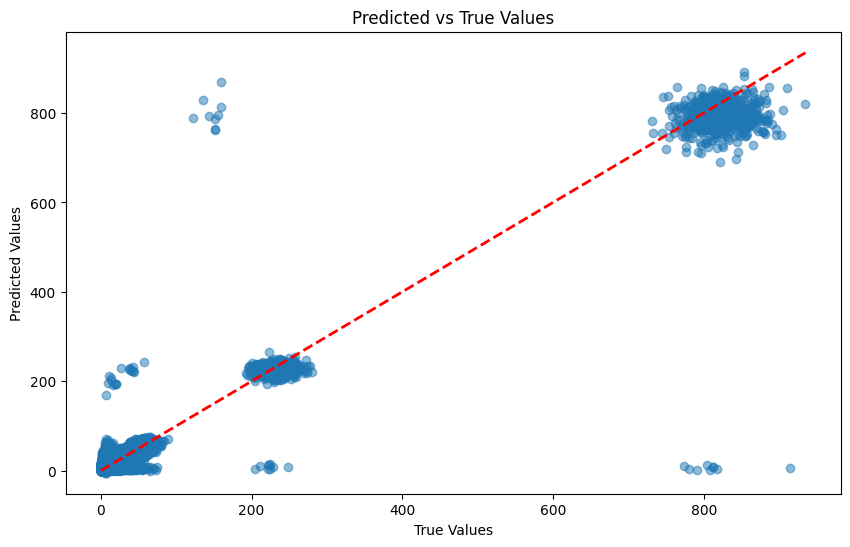

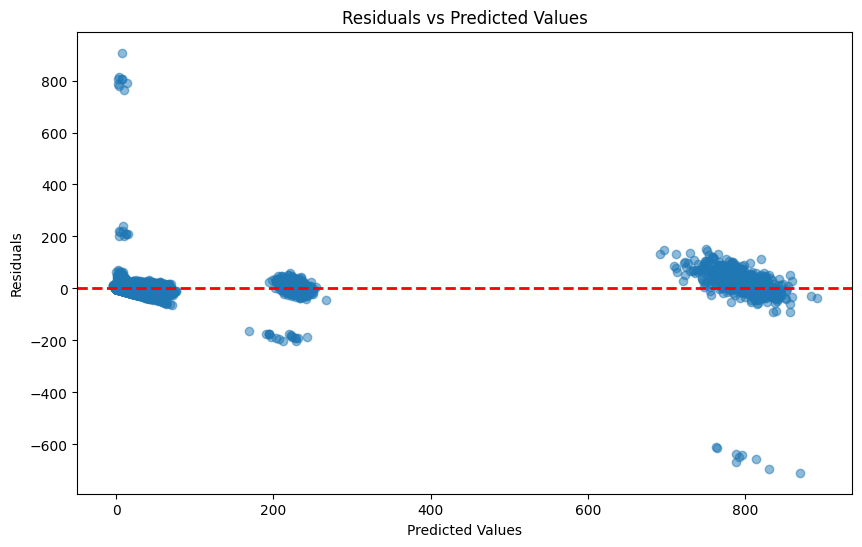

In [59]:
# Plotting predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_true.numpy(), y_pred.numpy(), alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()

# Plotting residuals (errors)
residuals = y_true - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.numpy(), residuals.numpy(), alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plotting Mean Squared Error over epochs (if you have epoch-wise MSEs)
# Assuming `epoch_mse` is a list or array holding MSE values for each epoch
# epoch_mse = [value for each epoch]

# plt.figure(figsize=(10, 6))
# plt.plot(range(epochs), epoch_mse, label='MSE')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error')
# plt.title('Training MSE Over Epochs')
# plt.legend()
# plt.show()

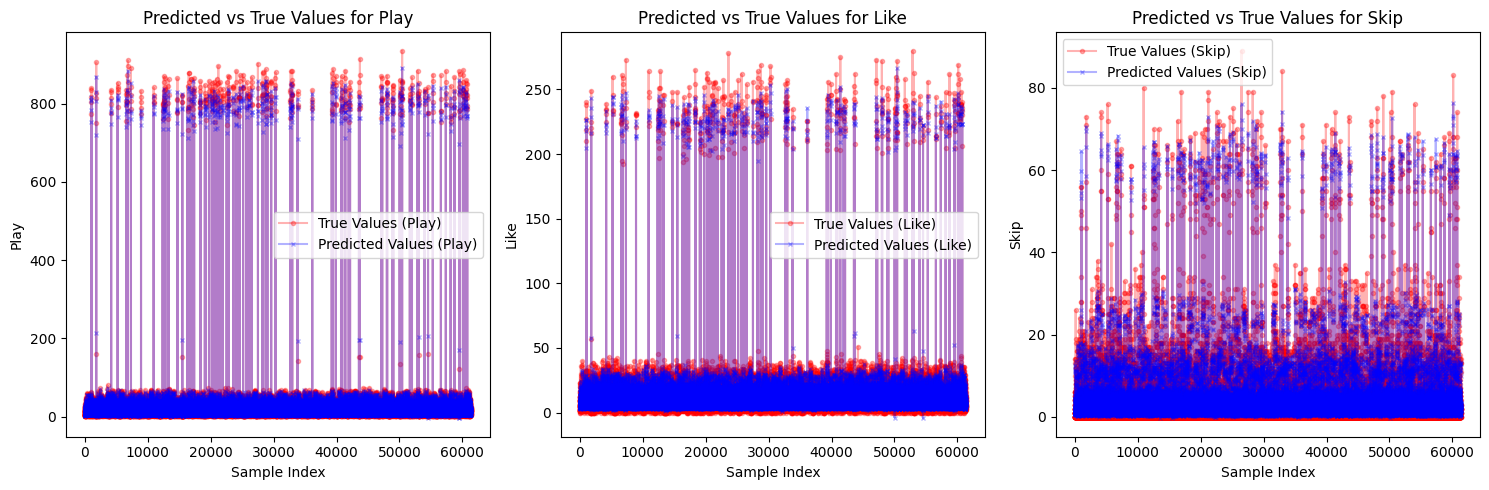

In [60]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are tensors of shape [batch_size, 3]
# The first feature is for play, the second for like, and the third for skip.

# Create a 1x3 grid for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first feature (play) on the first subplot
axs[0].plot(y_true[:, 0].numpy(), label='True Values (Play)', color='red', marker='o', markersize=3, linestyle='-', alpha=0.3)
axs[0].plot(y_pred[:, 0].numpy(), label='Predicted Values (Play)', color='blue', marker='x', markersize=3, linestyle='-', alpha=0.3)
axs[0].set_title('Predicted vs True Values for Play')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Play')
axs[0].legend()

# Plot the second feature (like) on the second subplot
axs[1].plot(y_true[:, 1].numpy(), label='True Values (Like)', color='red', marker='o', markersize=3, linestyle='-', alpha=0.3)
axs[1].plot(y_pred[:, 1].numpy(), label='Predicted Values (Like)', color='blue', marker='x', markersize=3, linestyle='-', alpha=0.3)
axs[1].set_title('Predicted vs True Values for Like')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Like')
axs[1].legend()

# Plot the third feature (skip) on the third subplot
axs[2].plot(y_true[:, 2].numpy(), label='True Values (Skip)', color='red', marker='o', markersize=3, linestyle='-', alpha=0.3)
axs[2].plot(y_pred[:, 2].numpy(), label='Predicted Values (Skip)', color='blue', marker='x', markersize=3, linestyle='-', alpha=0.3)
axs[2].set_title('Predicted vs True Values for Skip')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('Skip')
axs[2].legend()

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Model zaawansowany

### Uczenie

In [46]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import numpy as np

class SongEventDataset(Dataset):
    def __init__(self, tracks_artists, event_counts, max_genres=12, num_keys=12, split="train", val_part=0.1, test_part=0.1, n_seqs=5):
        self.tracks_artists = tracks_artists
        self.event_counts = event_counts
        self.max_genres = max_genres
        self.num_keys = num_keys
        self.tracks_dict = tracks_artists.set_index('id_x').to_dict(orient='index')

        prev_id = event_counts["track_id"][0]
        self.n_weeks = 0
        for index, row in event_counts.iterrows():
            if(row["track_id"] != prev_id):
                break
            self.n_weeks += 1
        print(self.n_weeks)

        self.n_val = int(val_part * self.n_weeks)
        self.n_test = int(test_part * self.n_weeks)
        self.n_train = self.n_weeks - self.n_val - self.n_test

        self.n_seqs = n_seqs
        self.split = split

        self.offset = 0
        if self.split == "val":
            self.offset = self.n_val
        if self.split == "test":
            self.offset = self.n_val + self.n_test

        self.seq_len = self.n_train - self.n_seqs

    def __len__(self):
        return len(self.event_counts) // self.n_weeks * self.n_seqs

    def __getitem__(self, idx):
        # Calculate song and sequence indices
        song_idx = idx // self.n_seqs
        seq_idx = idx % self.n_seqs
        idx_start = song_idx * self.n_weeks + seq_idx + self.offset
        idx_end = idx_start + self.seq_len

        # Slice the DataFrame for the sequence
        seq_df = self.event_counts.iloc[idx_start:idx_end]

        # Prepare input tensors using vectorized operations
        # Event features: [seq_len, 3]
        event_features_seq = torch.tensor(seq_df[['play', 'like', 'skip']].values, dtype=torch.float)

        # One-hot encoded keys: [seq_len, num_keys]
        keys = seq_df['track_id'].map(lambda track_id: self.tracks_dict[track_id]['key']).values# One-hot encoded keys: [seq_len, num_keys]

        try:
            key_one_hot_seq = F.one_hot(torch.tensor(keys, dtype=torch.long), num_classes=self.num_keys).float()
        except:
            for track_id, key in zip(seq_df['track_id'], keys):
                print(f"Invalid key detected:")
                print(f"  Song ID: {track_id}")
                print(f"  Dataset Index: {idx}")
                print(f"  Key value: {key}")
                print(f"  Key type: {type(key)}")

        # Genre tensor: [seq_len, max_genres]
        genres = seq_df['track_id'].map(lambda track_id: self.tracks_dict[track_id]['genre_indices']).values
        genre_tensor_seq = torch.zeros((self.seq_len, self.max_genres), dtype=torch.long)
        for i, genre_list in enumerate(genres):
            genre_tensor_seq[i, :len(genre_list)] = torch.tensor(genre_list[:self.max_genres], dtype=torch.long)

        # Target output (play, like, skip) at idx_end
        target_row = self.event_counts.iloc[idx_end]
        target = torch.tensor([target_row['play'], target_row['like'], target_row['skip']], dtype=torch.float)

        return (event_features_seq, key_one_hot_seq, genre_tensor_seq), target


# Example usage:
# Assuming `tracks_artists` and `event_counts` are already loaded as DataFrames
# tracks_artists = pd.read_csv('tracks_artists.csv')
# event_counts = pd.read_csv('event_counts.csv')

# Create the dataset for training split
dataset = SongEventDataset(tracks_artists, event_counts_complete)

# Access a sample from the train set
inputs, target = dataset[0]

event_features_seq, key_one_hot_seq, genre_tensor_seq = inputs
print("Event Features Sequence Shape:", event_features_seq.shape)
print("Key One-Hot Sequence Shape:", key_one_hot_seq.shape)
print("Genre Tensor Sequence Shape:", genre_tensor_seq.shape)
print("Target:", target)


53
Event Features Sequence Shape: torch.Size([38, 3])
Key One-Hot Sequence Shape: torch.Size([38, 12])
Genre Tensor Sequence Shape: torch.Size([38, 12])
Target: tensor([24., 18.,  2.])


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SongEventPredictionModel(nn.Module):
    def __init__(self, num_keys=12, max_genres=12, n_genres=780, embedding_dim=32, hidden_dim=256, output_dim=3):
        """
        Args:
            num_keys (int): Number of unique keys for one-hot encoding.
            max_genres (int): Maximum number of genres.
            embedding_dim (int): Dimension of the genre embeddings.
            hidden_dim (int): Number of neurons in the hidden layers.
            output_dim (int): Number of outputs (e.g., 3 for plays, likes, skips).
        """
        super(SongEventPredictionModel, self).__init__()

        self.num_keys = num_keys
        self.max_genres = max_genres
        self.embedding_dim = embedding_dim

        # Genre Embedding Layer
        self.genre_embedding = nn.Embedding(num_embeddings=n_genres, embedding_dim=embedding_dim, padding_idx=0)

        # LSTM Layer
        self.lstm_input_dim = 3 + num_keys + embedding_dim  # Combine event features, one-hot keys, and genre embeddings
        self.lstm = nn.LSTM(input_size=self.lstm_input_dim, hidden_size=hidden_dim, num_layers=4, batch_first=True, dropout=0.2)

        # Fully Connected Layer
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, event_features, key_one_hot, genre_tensor):
        # Batch size and sequence length
        batch_size, seq_len, _ = event_features.size()

        # Process genres
        genre_embeddings = self.genre_embedding(genre_tensor)  # [batch_size, max_genres, embedding_dim]
        mask = genre_tensor != 0
        genre_embeddings = genre_embeddings * mask.unsqueeze(-1)
        genre_embeddings = genre_embeddings.sum(dim=2)  # Sum over max_genres
        num_genres = mask.sum(dim=2).float()
        genre_embeddings = genre_embeddings / (num_genres.unsqueeze(-1) + 1e-6)  # [batch_size, seq_len, embedding_dim]

        # Concatenate all inputs
        event_features = torch.log(event_features + 1e-6)
        x = torch.cat((event_features, key_one_hot, genre_embeddings), dim=-1)  # [batch_size, seq_len, lstm_input_dim]

        # Pass through LSTM
        lstm_out, _ = self.lstm(x)  # lstm_out: [batch_size, seq_len, hidden_dim]

        # Predict the next week's events using the output from the last time step
        fc1_out = nn.LeakyReLU()(self.fc1(lstm_out[:, -1, :]))  # Use the last hidden state
        output = self.fc2(fc1_out)  # Use the last hidden state
        output = torch.exp(output)
        return output


In [48]:

dataset_train = list(SongEventDataset(tracks_artists, event_counts_complete))
dataset_val = list(SongEventDataset(tracks_artists, event_counts_complete, split="val"))
dataset_test = list(SongEventDataset(tracks_artists, event_counts_complete, split="test"))

53
53
53


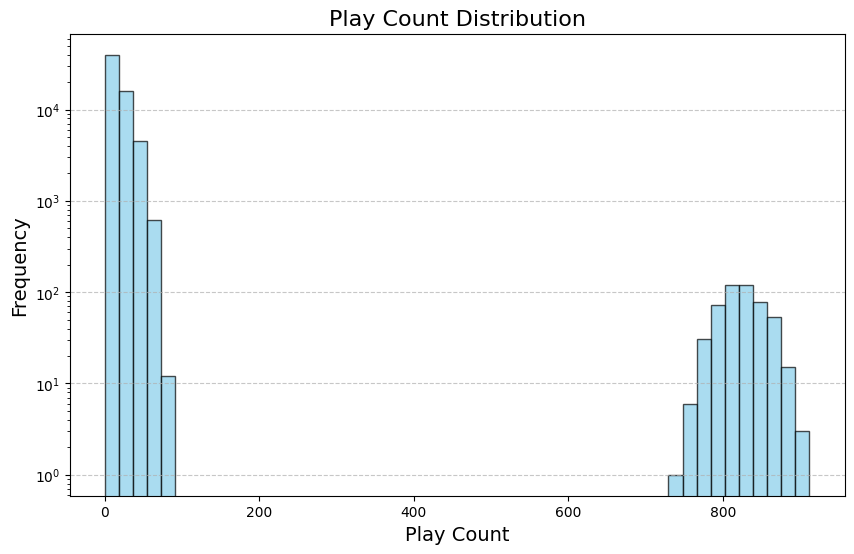

In [50]:
import matplotlib.pyplot as plt

# Collect all play counts
play_counts = []

for _, target in dataset_train:
    play_counts.append(target[0].item())  # Extract the play count (first element)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(play_counts, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Play Count Distribution", fontsize=16)
plt.xlabel("Play Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()


In [51]:
high_play_count_indices = []

# Iterate over the dataset to collect indices of sequences with high play counts
for idx, (_, target) in enumerate(dataset_train):
    play_count = target[0].item()  # Extract the play count (first element)
    if play_count > 500:
        high_play_count_indices.append(idx)

# Duplicate high-play count sequences
num_duplicates = 30  # Adjust the number of duplicates based on your needs
duplicated_dataset = []

# Add normal sequences
for data in dataset_train:
    duplicated_dataset.append(data)

# Add the duplicated high-play count sequences
for idx in high_play_count_indices:
    data = duplicated_dataset[idx]
    for _ in range(num_duplicates):  # Duplicate each high-play count sequence
        duplicated_dataset.append(data)

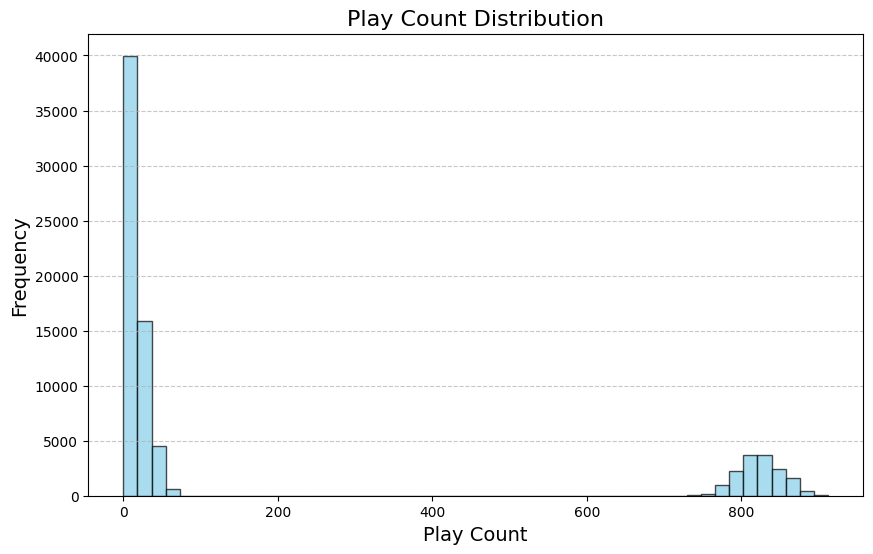

In [52]:
import matplotlib.pyplot as plt

# Collect all play counts
play_counts = []

for _, target in duplicated_dataset:
    play_counts.append(target[0].item())  # Extract the play count (first element)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(play_counts, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Play Count Distribution", fontsize=16)
plt.xlabel("Play Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()


In [53]:
from torch.utils.data import DataLoader

# Create a DataLoader for the dataset
train_loader = DataLoader(duplicated_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=128, shuffle=True)


In [74]:
model = SongEventPredictionModel()
model = model.to("cuda")

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming model, train_loader, and optimizer are defined
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Number of epochs
num_epochs = 300
start_epoch = 0
start_lr = 1e-4
end_lr = 1e-12

lambda_lr = lambda epoch: (end_lr/start_lr) ** (epoch/num_epochs)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_lr)

# Training Loop
for epoch in range(start_epoch, num_epochs):
    model.train()  # Set model to training mode
    epoch_loss = 0.0
    total_r2 = 0.0
    val_epoch_loss = 0.0
    val_total_r2 = 0.0

    for inputs, targets in train_loader:
        event_features_seq, key_one_hot, genre_tensor = inputs
        
        # Move data to the GPU
        event_features_seq = event_features_seq.to("cuda")
        key_one_hot = key_one_hot.to("cuda")
        genre_tensor = genre_tensor.to("cuda")
        targets = targets.to("cuda")

        # Forward pass
        predictions = model(event_features_seq, key_one_hot, genre_tensor)

        # Compute loss
        loss = criterion(predictions, targets)
        epoch_loss += loss.item()

        # Compute R²
        ss_residual = torch.sum((targets - predictions) ** 2)
        ss_total = torch.sum((targets - torch.mean(targets, dim=0)) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        total_r2 += r2.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    i_val = 0
    for inputs, targets in val_loader:
        i_val += 1
        event_features_seq, key_one_hot, genre_tensor = inputs
        
        # Move data to the GPU
        event_features_seq = event_features_seq.to("cuda")
        key_one_hot = key_one_hot.to("cuda")
        genre_tensor = genre_tensor.to("cuda")
        targets = targets.to("cuda")

        # Forward pass
        predictions = model(event_features_seq, key_one_hot, genre_tensor)

        # Compute loss
        loss = criterion(predictions, targets)
        val_epoch_loss += loss.item()

        # Compute R²
        ss_residual = torch.sum((targets - predictions) ** 2)
        ss_total = torch.sum((targets - torch.mean(targets, dim=0)) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        val_total_r2 += r2.item()
    
    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]

    # Average loss and R² for the epoch
    avg_loss = epoch_loss / len(train_loader)
    avg_r2 = total_r2 / len(train_loader)
    val_avg_loss = val_epoch_loss / i_val
    val_avg_r2 = val_total_r2 / i_val

    print(f"Epoch [{epoch + 1}/{num_epochs}] LR: {current_lr:.13f}, Train Loss: {avg_loss:.4f}, Train R²: {avg_r2:.4f}, Val Loss: {val_avg_loss:.4f}, Val R²: {val_avg_r2:.4f}")


Epoch [1/300] LR: 0.0000940444852, Train Loss: 4908.4307, Train R²: 0.8686, Val Loss: 34.8513, Val R²: 0.8425
Epoch [2/300] LR: 0.0000884436519, Train Loss: 131.6183, Train R²: 0.9965, Val Loss: 27.9270, Val R²: 0.8730
Epoch [3/300] LR: 0.0000831763771, Train Loss: 113.2352, Train R²: 0.9970, Val Loss: 25.0305, Val R²: 0.8839
Epoch [4/300] LR: 0.0000782227956, Train Loss: 101.0190, Train R²: 0.9973, Val Loss: 20.9429, Val R²: 0.9028
Epoch [5/300] LR: 0.0000735642254, Train Loss: 98.6883, Train R²: 0.9974, Val Loss: 20.2027, Val R²: 0.9071
Epoch [6/300] LR: 0.0000691830971, Train Loss: 96.0521, Train R²: 0.9975, Val Loss: 19.4378, Val R²: 0.9146
Epoch [7/300] LR: 0.0000650628875, Train Loss: 94.4360, Train R²: 0.9975, Val Loss: 19.2635, Val R²: 0.9148
Epoch [8/300] LR: 0.0000611880576, Train Loss: 90.5007, Train R²: 0.9976, Val Loss: 18.5684, Val R²: 0.9192
Epoch [9/300] LR: 0.0000575439937, Train Loss: 90.3449, Train R²: 0.9976, Val Loss: 18.2745, Val R²: 0.9219
Epoch [10/300] LR: 0.00

### Ewaluacja

In [110]:
model.eval()
val_epoch_loss = 0.0
val_total_r2 = 0.0
val_total_mape = 0.0
total_correct_direction_count = 0
total_count = 0
total_correct_direction_count_high = 0
total_count_high = 0
total_correct_direction_count_low = 0
total_count_low = 0

for inputs, targets in val_loader:
    event_features_seq, key_one_hot, genre_tensor = inputs
    
    # Move data to the GPU
    event_features_seq = event_features_seq.to("cuda")
    key_one_hot = key_one_hot.to("cuda")
    genre_tensor = genre_tensor.to("cuda")
    targets = targets.to("cuda")

    # Forward pass
    predictions = model(event_features_seq, key_one_hot, genre_tensor)

    # Compute loss (MSE)
    loss = criterion(predictions, targets)
    val_epoch_loss += loss.item()

    # Compute R²
    ss_residual = torch.sum((targets - predictions) ** 2)
    ss_total = torch.sum((targets - torch.mean(targets, dim=0)) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    val_total_r2 += r2.item()

    # Extract only the first prediction (play count) and the corresponding target for direction accuracy
    first_pred = predictions[:, 0]  # First prediction (play count) from model output
    first_target = targets[:, 0]  # Corresponding first target (play count)
    last_input_value = event_features_seq[:, -1, 0]  # Last value from event_features_seq

    # Measure direction correctness (increase/decrease comparison)
    actual_direction = torch.sign(first_target - last_input_value)  # Signs for consecutive target play counts
    predicted_direction = torch.sign(first_pred - last_input_value)  # Signs for consecutive predicted play counts

    # Compare actual and predicted directions element-wise
    total_correct_direction_count += torch.sum(actual_direction == predicted_direction).item()
    total_count += actual_direction.numel()  # Total number of direction comparisons

    # Mask for values greater than 500 and less than or equal to 500
    mask_high = first_target > 500
    mask_low = first_target <= 500
    # Calculate direction accuracy for high and low target values, across all time steps
    correct_direction_count_high = torch.sum((actual_direction == predicted_direction) & mask_high).item()  # Mask applies to all time steps except the first one
    correct_direction_count_low = torch.sum((actual_direction == predicted_direction) & mask_low).item()  # Same here

    count_high = mask_high.sum().item()  # Count of elements where target > 500, for each time step
    count_low = mask_low.sum().item()  # Count of elements where target <= 500, for each time step

    total_correct_direction_count_high += correct_direction_count_high
    total_correct_direction_count_low += correct_direction_count_low

    total_count_high += count_high
    total_count_low += count_low

val_avg_loss = val_epoch_loss / len(val_loader)
val_avg_r2 = val_total_r2 / len(val_loader)

direction_accuracy = (total_correct_direction_count / total_count) * 100 if total_count > 0 else 0
direction_accuracy_high = (total_correct_direction_count_high / total_count_high) * 100 if total_count_high > 0 else 0
direction_accuracy_low = (total_correct_direction_count_low / total_count_low) * 100 if total_count_low > 0 else 0

print(f"Val Loss: {val_avg_loss:.4f}, Val R²: {val_avg_r2:.4f}, Direction Accuracy: {direction_accuracy:.2f}%, Direction Accuracy (High Target): {direction_accuracy_high:.2f}%, Direction Accuracy (Low Target): {direction_accuracy_low:.2f}%")


Val Loss: 13.9901, Val R²: 0.9459, Direction Accuracy: 70.45%, Direction Accuracy (High Target): 73.40%, Direction Accuracy (Low Target): 70.43%


In [115]:
torch.save(model, 'model.pth')

In [114]:
model.eval()
for inputs, targets in val_loader:
    event_features_seq, key_one_hot, genre_tensor = inputs
    
    # Move data to the GPU
    event_features_seq = event_features_seq.to("cuda")
    key_one_hot = key_one_hot.to("cuda")
    genre_tensor = genre_tensor.to("cuda")
    targets = targets.to("cuda")

    # Forward pass
    predictions = model(event_features_seq, key_one_hot, genre_tensor)

    # Get the last and second-to-last event features for each sample in the batch
    last_event_features = event_features_seq[:, -1, :].cpu().detach().numpy()
    second_last_event_features = event_features_seq[:, -2, :].cpu().detach().numpy()

    # Print second last event features, last event features, predictions, and targets side by side
    print(f"{'Second Last Event Features Seq':<40} {'Last Event Features Seq':<40} {'Predictions':<40} {'Targets'}")
    for second_last_event_feature, last_event_feature, pred, target in zip(second_last_event_features, last_event_features, predictions, targets):
        print(f"{second_last_event_feature} {' ' * (40 - len(str(second_last_event_feature)))} "
              f"{last_event_feature} {' ' * (40 - len(str(last_event_feature)))} "
              f"{pred.cpu().detach().numpy()} {' ' * (40 - len(str(pred.cpu().detach().numpy())))} "
              f"{target.cpu().detach().numpy()}")
    break


Second Last Event Features Seq           Last Event Features Seq                  Predictions                              Targets
[38. 21.  4.]                             [50. 30.  4.]                             [37.43664   20.774656   4.7049847]        [25. 12.  2.]
[7. 5. 2.]                                [11.  8.  1.]                             [7.360859 4.981868 1.086631]              [6. 4. 0.]
[6. 5. 0.]                                [4. 3. 0.]                                [6.6381907 4.6775246 1.0687801]           [2. 0. 1.]
[33. 15.  8.]                             [33. 13.  3.]                             [34.805218  16.924528   3.9477487]        [30. 19.  3.]
[4. 3. 0.]                                [3. 2. 0.]                                [6.2908783 4.49383   1.0541584]           [4. 4. 0.]
[4. 2. 2.]                                [5. 2. 1.]                                [6.628463  4.6210666 1.0053145]           [3. 2. 0.]
[6. 4. 3.]                               

In [313]:
model_v3 = model

In [314]:
model = model_v1

## Mikroserwis

In [62]:
%pip install fastapi uvicorn flask

Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from flask import Flask, request, jsonify
import logging
# Initialize Flask app
app = Flask(__name__)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

@app.route('/log_action', methods=['POST'])
def log_action():
    try:
        # Get track_id and action from JSON body
        data = request.get_json()

        # Extract track_id and action, and log the current action
        track_id = data.get('track_id')
        action = data.get('action')

        # Validate input
        if not track_id or not action:
            return jsonify({'error': 'track_id and action are required'}), 400

        # Log the action
        logger.info(f"Track ID: {track_id}, Action: {action}")

        # Respond back with success
        return jsonify({
            'message': 'Action logged successfully',
            'track_id': track_id,
            'action': action
        })

    except Exception as e:
        # Log any exceptions that occur
        logger.error(f"Error processing request: {e}")
        return jsonify({'error': 'An error occurred'}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/wlad/ium/.venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/wlad/ium/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/home/wlad/ium/.venv/lib/python3.10/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/home/wlad/ium/.venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", l

SystemExit: 1

/home/wlad/ium/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 